# Choose the MSM lag-time
quick MSM to check what a sensible lag-time would be


In [56]:
from msmbuilder.feature_extraction import DihedralFeaturizer
from msmbuilder.feature_selection import VarianceThreshold
from msmbuilder.preprocessing import RobustScaler
from msmbuilder.decomposition import tICA
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import MarkovStateModel
from msmbuilder.io import load_meta, preload_tops
from mdtraj import load

In [57]:
meta = load_meta('meta.pandas.pickl')
tops = preload_tops(meta)
trajs = [load(row['traj_fn'], top=tops[row['top_fn']], stride=10)
         for i, row in meta.iterrows()]

/Users/robert_arbon/anaconda/envs/ml4dyn/lib/python3.5/site-packages/mdtraj/formats/pdb/pdbfile.py:196: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


In [58]:
ftrajs = DihedralFeaturizer().fit_transform(trajs)

In [59]:
ftrajs = VarianceThreshold().fit_transform(ftrajs)
ftrajs = RobustScaler().fit_transform(ftrajs)

In [60]:
ttrajs = tICA(n_components=4, lag_time=2).fit_transform(ftrajs)

In [61]:
import numpy as np
n = np.round(np.sqrt(1000*28)).astype(int)
ctrajs = MiniBatchKMeans(n_clusters=n, random_state=42).fit_transform(ttrajs)

In [62]:
lags = np.arange(2, 102, 2)
timescales = np.zeros(lags.shape[0])
for idx, lag in enumerate(lags):
    print(lag, end=', ')
    msm = MarkovStateModel(n_timescales=1, lag_time=int(lag), verbose=True)
    msm.fit(ctrajs)
    timescales[idx] = msm.timescales_[0]
    

2, MSM contains 1 strongly connected component above weight=0.50. Component 0 selected, with population 100.000000%
4, MSM contains 1 strongly connected component above weight=0.25. Component 0 selected, with population 100.000000%
6, MSM contains 1 strongly connected component above weight=0.17. Component 0 selected, with population 100.000000%
8, MSM contains 1 strongly connected component above weight=0.12. Component 0 selected, with population 100.000000%
10, MSM contains 1 strongly connected component above weight=0.10. Component 0 selected, with population 100.000000%
12, MSM contains 1 strongly connected component above weight=0.08. Component 0 selected, with population 100.000000%
14, MSM contains 1 strongly connected component above weight=0.07. Component 0 selected, with population 100.000000%
16, MSM contains 1 strongly connected component above weight=0.06. Component 0 selected, with population 100.000000%
18, MSM contains 1 strongly connected component above weight=0.06. C

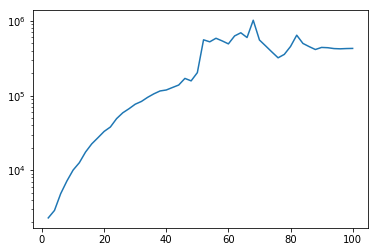

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(lags, timescales)
plt.yscale('log')